1. Cài đặt thư viện

In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pillow numpy scipy matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.


2. Viết chương trình phân vùng ảnh

2.1 Phân vùng theo histogram

2.1.1 Phương pháp Otsu

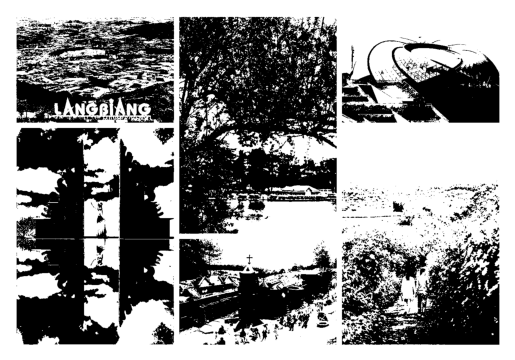

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Đọc hình ảnh và chuyển đổi sang ảnh xám
data = Image.open('exercise/dalat.jpg').convert('L')

# Chuyển đổi hình ảnh thành mảng numpy
image_array = np.asarray(data)

# Thực hiện ngưỡng Otsu
thresh = threshold_otsu(image_array)

# Các pixel có cường độ lớn hơn ngưỡng sẽ được giữ lại
binary_image = image_array > thresh

# Hiển thị hình ảnh nhị phân
plt.imshow(binary_image, cmap='gray')
plt.axis('off')  # Tắt trục
plt.show()

2.1.2 Phương pháp Adaptive Thresholding`

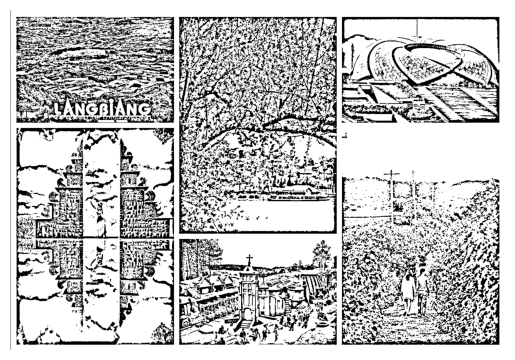

In [ ]:
from PIL import Image
import numpy as np
import scipy.ndimage as io
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# Đọc hình ảnh và chuyển đổi sang dạng grayscale
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)

# Thực hiện phân ngưỡng địa phương
block_size = 39  # Kích thước khối
offset = 10      # Giá trị bù
b = threshold_local(a, block_size, offset=offset)

# Chuyển đổi lại thành hình ảnh nhị phân
binary_image = a > b

# Chuyển đổi lại thành hình ảnh
binary_image = Image.fromarray(binary_image.astype(np.uint8) * 255)

# Hiển thị kết quả
plt.imshow(binary_image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

2.2 Phân vùng theo region

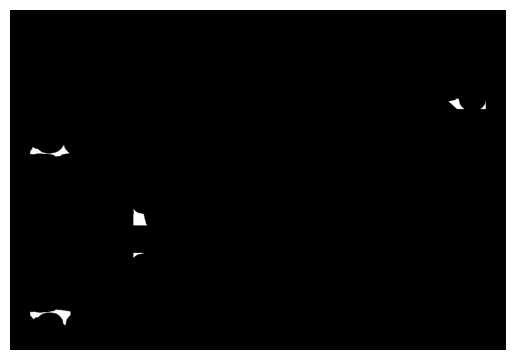

In [ ]:
import cv2
from PIL import Image
import numpy as np
import scipy.ndimage as io
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# Mở hình ảnh và chuyển đổi sang grayscale
image = cv2.imread('exercise/dalat.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thực hiện phân ngưỡng Otsu
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Thực hiện thao tác erode để loại bỏ noise
kernel = np.ones((3, 3), np.uint8)
dist_trans = cv2.erode(thresh, kernel, iterations=2)

# Tính toán khoảng cách và phân đoạn hình ảnh
dist_transform = cv2.distanceTransform(dist_trans, cv2.DIST_L2, 5)
ret, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
markers = np.uint8(markers)

# Gán nhãn cho các pixel
labels = cv2.connectedComponents(markers)[1]

# Chuyển đổi lại thành hình ảnh
b = Image.fromarray(labels.astype(np.uint8) * 255)

# Hiển thị kết quả
plt.imshow(b, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

2.3 Biển đổi đối tượng trong ảnh

2.3.1. Sử dụng Binary Dilation

In [ ]:
import cv2
from PIL import Image
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# Mở hình ảnh và chuyển đổi sang grayscale
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)

# Thực hiện binary dilation
dilated_image = ndi.binary_dilation(a > 0, iterations=50)

# Chuyển đổi lại thành hình ảnh
c = Image.fromarray(dilated_image.astype(np.uint8) * 255)

# Hiển thị kết quả
c.show()

2.3.2. Sử dụng Binary Opening

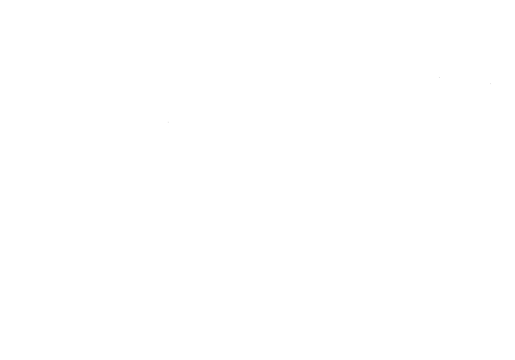

In [ ]:
from PIL import Image
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

# Mở hình ảnh và chuyển đổi sang grayscale
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)

# Thực hiện binary opening
opened_image = ndi.binary_opening(a > 0, structure=np.ones((3, 3)))

# Chuyển đổi lại thành hình ảnh
b = Image.fromarray(opened_image.astype(np.uint8) * 255)

# Hiển thị kết quả
plt.imshow(b, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

2.3.3 Sử dụng binary_erosion

In [18]:
pip install pillow numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


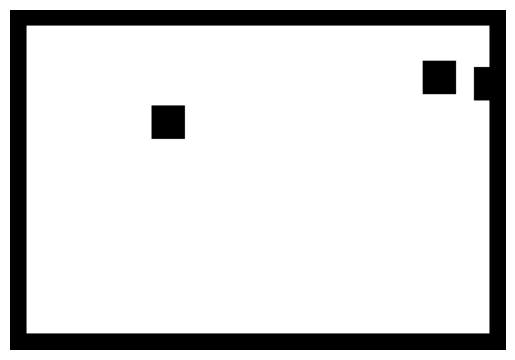

In [ ]:
import cv2
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Mở hình ảnh và chuyển đổi sang grayscale
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)

# Định nghĩa phần tử cấu trúc
structure = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]])

# Thực hiện binary erosion
b = nd.binary_erosion(a > 0, structure=structure, iterations=50)

# Chuyển đổi lại thành hình ảnh
c = Image.fromarray(b.astype(np.uint8) * 255)

# Hiển thị kết quả
c.show()
plt.imshow(c, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

2.3.4 Sử dụng binary_closing

In [21]:
pip install pillow numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


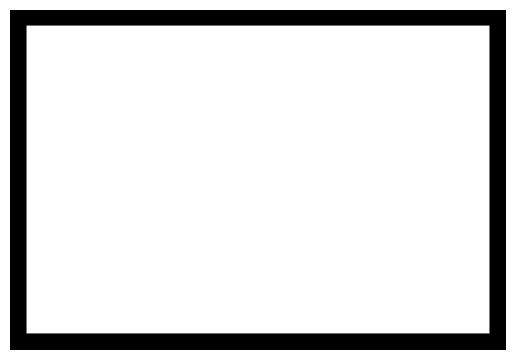

In [ ]:
import cv2
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Mở hình ảnh và chuyển đổi sang grayscale
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)

# Định nghĩa phần tử cấu trúc
structure = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]])

# Thực hiện binary closing
b = nd.binary_closing(a > 0, structure=structure, iterations=50)

# Chuyển đổi lại thành hình ảnh
c = Image.fromarray(b.astype(np.uint8) * 255)

# Hiển thị kết quả
c.show()
plt.imshow(c, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

3. Bài tập

In [24]:
pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


1. Viết chương trình chọn Lang Biang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng Lang Biang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpgvà hiển thị trên màn hình.

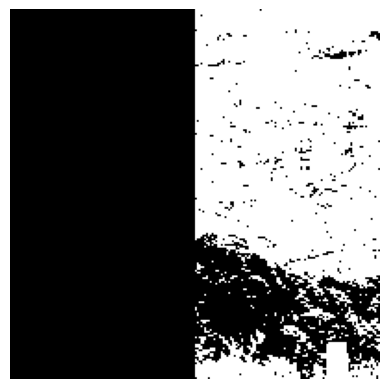

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Đọc hình ảnh
image = cv2.imread('exercise/langbiang.jpg')  # Đảm bảo đường dẫn đúng
if image is None:
    raise FileNotFoundError("Không tìm thấy hình ảnh.")

# Bước 2: Chọn vùng Lang Biang (giả định tọa độ vùng chọn)
x, y, w, h = 50, 50, 200, 200  # Tọa độ và kích thước vùng chọn
roi = image[y:y+h, x:x+w]

# Tịnh tiến vùng chọn sang phải 100px
translated_roi = np.zeros_like(roi)
translated_roi[:, 100:] = roi[:, :-100]

# Bước 3: Chuyển đổi sang grayscale
gray = cv2.cvtColor(translated_roi, cv2.COLOR_BGR2GRAY)

# Bước 4: Áp dụng phương pháp Otsu
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Lưu hình ảnh đã phân ngưỡng
cv2.imwrite('lang_biang.jpg', thresh)

# Bước 5: Hiển thị kết quả
plt.imshow(thresh, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là ho_xuan_huong.jpg.

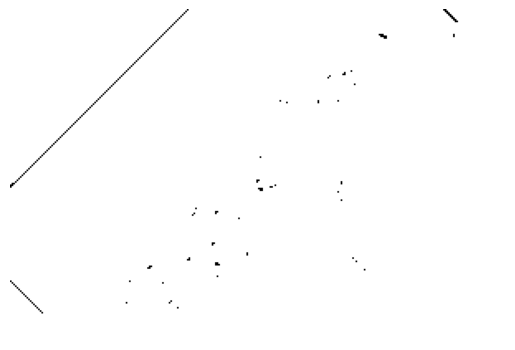

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Đọc hình ảnh
image = cv2.imread('exercise/ho_xuan_huong.jpg')  # Đảm bảo đường dẫn đúng
if image is None:
    raise FileNotFoundError("Không tìm thấy hình ảnh.")

# Bước 2: Chọn vùng Hồ Xuân Hương (giả định tọa độ vùng chọn)
x, y, w, h = 100, 100, 300, 200  # Tọa độ và kích thước vùng chọn
roi = image[y:y+h, x:x+w]

# Bước 3: Xoay vùng chọn 45 độ
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_roi = cv2.warpAffine(roi, rotation_matrix, (w, h))

# Bước 4: Chuyển đổi sang grayscale
gray = cv2.cvtColor(rotated_roi, cv2.COLOR_BGR2GRAY)

# Bước 5: Áp dụng phương pháp Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 60)

# Lưu hình ảnh đã phân ngưỡng
cv2.imwrite('ho_xuan_huong.jpg', adaptive_thresh)

# Bước 6: Hiển thị kết quả
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

3. Viết chương trình chọn Quản trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg.

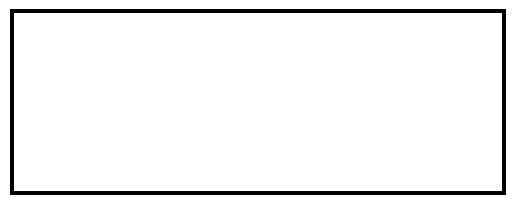

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing

# Bước 1: Đọc hình ảnh
image = cv2.imread('exercise/quan_truong_lam_vien.jpg')  # Đảm bảo đường dẫn đúng
if image is None:
    raise FileNotFoundError("Không tìm thấy hình ảnh.")

# Bước 2: Chọn vùng Quản Trường Lâm Viên (giả định tọa độ vùng chọn)
x, y, w, h = 150, 150, 300, 200  # Tọa độ và kích thước vùng chọn
roi = image[y:y+h, x:x+w]

# Bước 3: Chuyển đổi sang grayscale
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Bước 4: Áp dụng phương pháp Coordinate Mapping
# Chỉ cần giữ lại các pixel có giá trị lớn hơn một ngưỡng
_, binary_map = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Bước 5: Áp dụng Binary Closing
closed_image = binary_closing(binary_map / 255)  # Chuyển đổi thành kiểu float
closed_image = (closed_image * 255).astype(np.uint8)  # Chuyển đổi về kiểu uint8

# Lưu hình ảnh đã xử lý
cv2.imwrite('quan_truong_lam_vien.jpg', closed_image)

# Bước 6: Hiển thị kết quả
plt.imshow(closed_image, cmap='gray')
plt.axis('off')  # Ẩn trục
plt.show()

In [28]:
pip install opencv-python numpy matplotlib scipy scikit-image

Note: you may need to restart the kernel to use updated packages.


4. Tạo menu như hình sau:

Geometric_transformation

        Coordinate_mapping
    
        Rotate
    
        Scale
    
        Shift

Segment

        Adaptive_thresholding

        Binary_dilation

        Binary_erosion
    
        Otsu

Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment)

Chọn chức năng xử lý hình ảnh:
1. Geometric transformation
   a. Coordinate_mapping
   b. Rotate
   c. Scale
   d. Shift
2. Segment
   a. Adaptive_thresholding
   b. Binary_dilation
   c. Binary_erosion
   d. Otsu


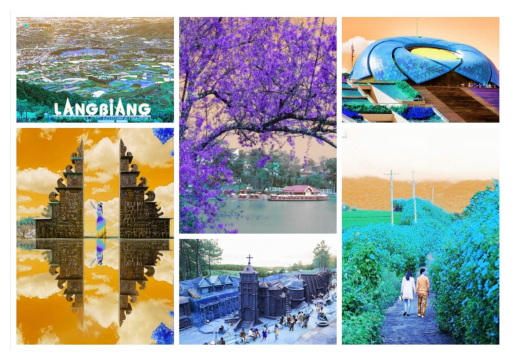

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation
from skimage.filters import threshold_otsu

def geometric_transformations(image, choice):
    if choice == 'Rotate':
        center = (image.shape[1] // 2, image.shape[0] // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
        return cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    
    elif choice == 'Scale':
        return cv2.resize(image, None, fx=1.5, fy=1.5)

    elif choice == 'Shift':
        M = np.float32([[1, 0, 100], [0, 1, 0]])  # Dịch sang phải 100px
        return cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    elif choice == 'Coordinate_mapping':
        return image  # Giữ nguyên hình ảnh

def segment(image, choice):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    if choice == 'Adaptive_thresholding':
        return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    elif choice == 'Binary_dilation':
        kernel = np.ones((5, 5), np.uint8)
        return binary_dilation(gray / 255, structure=kernel)

    elif choice == 'Binary_erosion':
        kernel = np.ones((5, 5), np.uint8)
        return binary_erosion(gray / 255, structure=kernel)

    elif choice == 'Otsu':
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return thresh

def main():
    image = cv2.imread('exercise/dalat.jpg')  # Thay đổi đường dẫn nếu cần
    if image is None:
        raise FileNotFoundError("Không tìm thấy hình ảnh.")

    print("Chọn chức năng xử lý hình ảnh:")
    print("1. Geometric transformation")
    print("   a. Coordinate_mapping")
    print("   b. Rotate")
    print("   c. Scale")
    print("   d. Shift")
    print("2. Segment")
    print("   a. Adaptive_thresholding")
    print("   b. Binary_dilation")
    print("   c. Binary_erosion")
    print("   d. Otsu")
    
    geom_choice = input("Chọn một chức năng geometric transformation (a/b/c/d): ").strip().lower()
    seg_choice = input("Chọn một chức năng segment (a/b/c/d): ").strip().lower()

    if geom_choice in ['a', 'b', 'c', 'd']:
        geom_func = ['Coordinate_mapping', 'Rotate', 'Scale', 'Shift'][ord(geom_choice) - ord('a')]
        transformed_image = geometric_transformations(image, geom_func)
    else:
        transformed_image = image

    if seg_choice in ['a', 'b', 'c', 'd']:
        seg_func = ['Adaptive_thresholding', 'Binary_dilation', 'Binary_erosion', 'Otsu'][ord(seg_choice) - ord('a')]
        final_image = segment(transformed_image, seg_func)
    else:
        final_image = transformed_image

    plt.imshow(final_image, cmap='gray')
    plt.axis('off')  # Ẩn trục
    plt.show()

if __name__ == '__main__':
    main()